# Run FaceSwapper

## 0. Define the user parameter

In [1]:
IMG_TO_CHANGE = "friends.jpg"
IMG_FACE      = "nono.jpeg"

## 1. Import Packages

In [6]:
import datetime
import numpy as np
import os
import os.path as osp
import glob
import cv2
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

## 2. Load the model

In [20]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))
swapper = insightface.model_zoo.get_model('inswapper_128.onnx', download=True, download_zip=True)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size

## 3. Load the image

In [21]:
!ls

'Demo Insight Faces.ipynb'   nono.jpeg		        starwars.jpg
 friends.jpg		    'Run Insight Faces.ipynb'


In [22]:
# img = ins_get_image(IMG_TO_CHANGE)
import matplotlib.image as mpimg
img = mpimg.imread(IMG_TO_CHANGE)

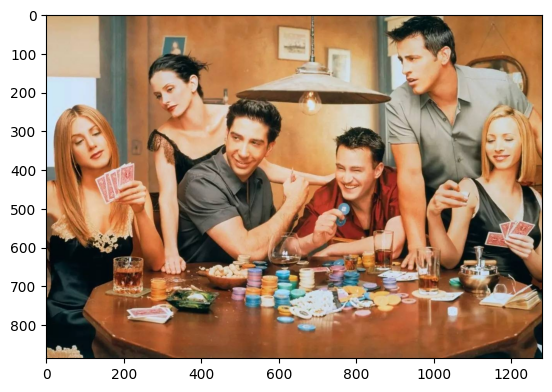

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
imgplot = plt.imshow(img)
plt.show()

## 4. Detect the faces

In [24]:
faces = app.get(img)
faces = sorted(faces, key = lambda x : x.bbox[0])

In [25]:
type(faces)

list

In [26]:
faces

[{'bbox': array([ 59.247185, 257.31668 , 166.9758  , 395.91342 ], dtype=float32),
  'kps': array([[ 88.08619 , 329.52097 ],
         [131.23918 , 308.56363 ],
         [122.223206, 340.67133 ],
         [114.17627 , 369.54004 ],
         [149.32697 , 351.7576  ]], dtype=float32),
  'det_score': 0.88272816,
  'landmark_3d_68': array([[ 5.32500496e+01,  3.44908325e+02,  7.78072510e+01],
         [ 6.28313408e+01,  3.58075226e+02,  7.69178162e+01],
         [ 7.29342270e+01,  3.71352051e+02,  7.46028442e+01],
         [ 8.28891602e+01,  3.83860168e+02,  6.98025513e+01],
         [ 9.39890518e+01,  3.93969757e+02,  5.89860497e+01],
         [ 1.05784386e+02,  3.99598877e+02,  4.91763077e+01],
         [ 1.17767899e+02,  4.01289948e+02,  3.98959160e+01],
         [ 1.30655075e+02,  3.99383209e+02,  2.80166893e+01],
         [ 1.47261993e+02,  3.95294830e+02,  2.30418644e+01],
         [ 1.60228897e+02,  3.84977661e+02,  3.07098198e+01],
         [ 1.67933701e+02,  3.75242950e+02,  4.5817611

In [27]:
len(faces)

6

## 5. Define the image of face to change (saveid)

In [28]:
app2 = FaceAnalysis(name='buffalo_l')
app2.prepare(ctx_id=0, det_size=(640, 640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/ctdo/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size

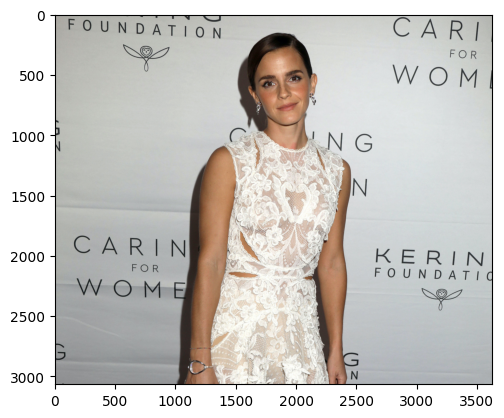

In [29]:
import matplotlib.image as mpimg
img2 = mpimg.imread(IMG_FACE)
imgplot = plt.imshow(img2)
plt.show()

In [30]:
faces2 = app2.get(img2)
faces2 = sorted(faces2, key = lambda x : x.bbox[0])

In [31]:
len(faces2)

1

In [32]:
source_face = faces2[0]

## 6. Make the faceswap

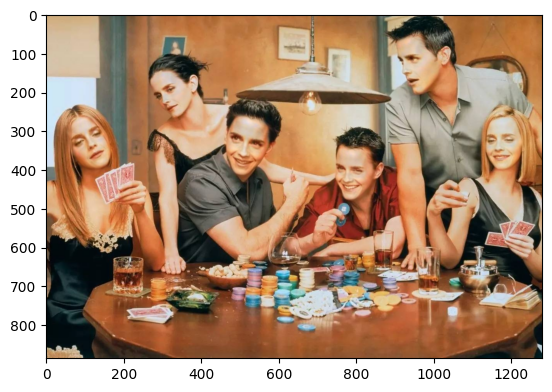

In [33]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)
# cv2.imwrite("./t1_swapped.jpg", res)
imgplot = plt.imshow(res)
plt.show()

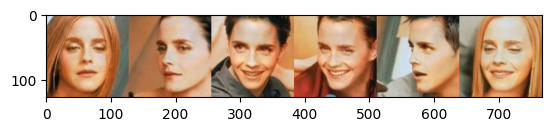

In [34]:
res2 = []
for face in faces:
    _img, _ = swapper.get(img, face, source_face, paste_back=False)
    res2.append(_img)
res2 = np.concatenate(res2, axis=1)
# cv2.imwrite("./t1_swapped2.jpg", res2)
imgplot = plt.imshow(res2)
plt.show()